<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n20.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,59.491999,73.930619,-0.003050,143.419568,143.427451,-0.007883
1,0.0,1.0,27.124392,22.441183,-0.038226,59.527348,59.580434,-0.053085
2,0.0,2.0,96.917427,89.645000,-0.010996,196.551432,196.570873,-0.019442
3,0.0,3.0,88.996591,26.923415,-0.036933,125.883073,125.948297,-0.065224
4,0.0,4.0,43.138626,59.990123,-0.003668,113.125081,113.134458,-0.009377
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.854131,95.094915,0.006823,183.955869,183.953714,0.002155
59996,999.0,56.0,99.926898,87.848768,0.072248,197.847915,197.790875,0.057040
59997,999.0,57.0,62.820317,59.447150,-0.006522,132.260946,132.270940,-0.009994
59998,999.0,58.0,72.599509,35.235158,0.028774,117.863442,117.846488,0.016954


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,59.491999,73.930619,-0.003050,143.419568,143.427451,-0.007883
1,0.0,1.0,27.124392,22.441183,-0.038226,59.527348,59.580434,-0.053085
2,0.0,2.0,96.917427,89.645000,-0.010996,196.551432,196.570873,-0.019442
3,0.0,3.0,88.996591,26.923415,-0.036933,125.883073,125.948297,-0.065224
4,0.0,4.0,43.138626,59.990123,-0.003668,113.125081,113.134458,-0.009377
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.854131,95.094915,0.006823,183.955869,183.953714,0.002155
59996,999.0,56.0,99.926898,87.848768,0.072248,197.847915,197.790875,0.057040
59997,999.0,57.0,62.820317,59.447150,-0.006522,132.260946,132.270940,-0.009994
59998,999.0,58.0,72.599509,35.235158,0.028774,117.863442,117.846488,0.016954


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    59.491999  73.930619 -0.003050  143.419568  143.427451 -0.007883
      1.0    27.124392  22.441183 -0.038226   59.527348   59.580434 -0.053085
      2.0    96.917427  89.645000 -0.010996  196.551432  196.570873 -0.019442
      3.0    88.996591  26.923415 -0.036933  125.883073  125.948297 -0.065224
      4.0    43.138626  59.990123 -0.003668  113.125081  113.134458 -0.009377
...                ...        ...       ...         ...         ...       ...
999.0 55.0   78.854131  95.094915  0.006823  183.955869  183.953714  0.002155
      56.0   99.926898  87.848768  0.072248  197.847915  197.790875  0.057040
      57.0   62.820317  59.447150 -0.006522  132.260946  132.270940 -0.009994
      58.0   72.599509  35.235158  0.028774  117.863442  117.846488  0.016954
      59.0   46.174818  99.370867  0.020161  155.565846  155.535161  0.030685

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    59.491999  73.930619 -0.003050  143.419568  143.427451 -0.007883
      1.0    27.124392  22.441183 -0.038226   59.527348   59.580434 -0.053085
      2.0    96.917427  89.645000 -0.010996  196.551432  196.570873 -0.019442
      3.0    88.996591  26.923415 -0.036933  125.883073  125.948297 -0.065224
      4.0    43.138626  59.990123 -0.003668  113.125081  113.134458 -0.009377
...                ...        ...       ...         ...         ...       ...
999.0 55.0   78.854131  95.094915  0.006823  183.955869  183.953714  0.002155
      56.0   99.926898  87.848768  0.072248  197.847915  197.790875  0.057040
      57.0   62.820317  59.447150 -0.006522  132.260946  132.270940 -0.009994
      58.0   72.599509  35.235158  0.028774  117.863442  117.846488  0.016954
      59.0   46.174818  99.370867  0.020161  155.565846  155.535161  0.030685

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,59.491999,73.930619,-0.003050,143.419568,143.427451,-0.007883
1,0.0,1.0,27.124392,22.441183,-0.038226,59.527348,59.580434,-0.053085
2,0.0,2.0,96.917427,89.645000,-0.010996,196.551432,196.570873,-0.019442
3,0.0,3.0,88.996591,26.923415,-0.036933,125.883073,125.948297,-0.065224
4,0.0,4.0,43.138626,59.990123,-0.003668,113.125081,113.134458,-0.009377
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.854131,95.094915,0.006823,183.955869,183.953714,0.002155
59996,999.0,56.0,99.926898,87.848768,0.072248,197.847915,197.790875,0.057040
59997,999.0,57.0,62.820317,59.447150,-0.006522,132.260946,132.270940,-0.009994
59998,999.0,58.0,72.599509,35.235158,0.028774,117.863442,117.846488,0.016954


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    59.491999  73.930619 -0.003050  143.419568  143.427451 -0.007883
      1.0    27.124392  22.441183 -0.038226   59.527348   59.580434 -0.053085
      2.0    96.917427  89.645000 -0.010996  196.551432  196.570873 -0.019442
      3.0    88.996591  26.923415 -0.036933  125.883073  125.948297 -0.065224
      4.0    43.138626  59.990123 -0.003668  113.125081  113.134458 -0.009377
...                ...        ...       ...         ...         ...       ...
999.0 55.0   78.854131  95.094915  0.006823  183.955869  183.953714  0.002155
      56.0   99.926898  87.848768  0.072248  197.847915  197.790875  0.057040
      57.0   62.820317  59.447150 -0.006522  132.260946  132.270940 -0.009994
      58.0   72.599509  35.235158  0.028774  117.863442  117.846488  0.016954
      59.0   46.174818  99.370867  0.020161  155.565846  155.535161  0.030685

[60000 rows x 6 columns]

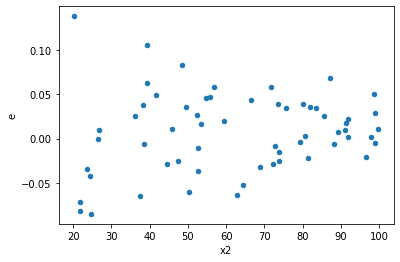

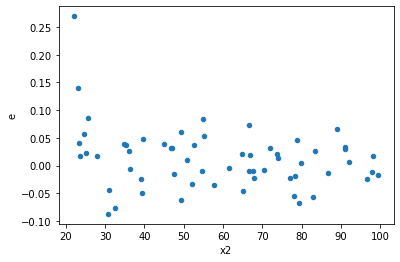

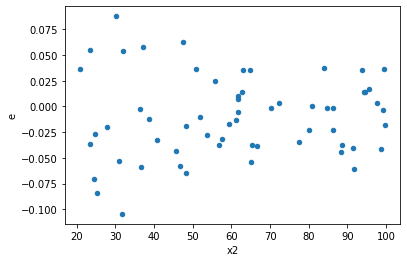

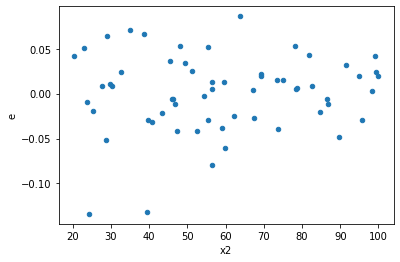

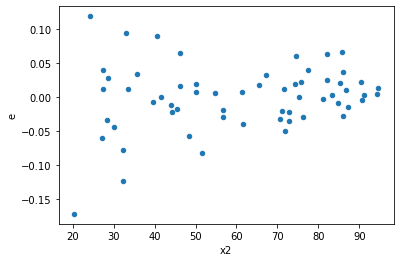

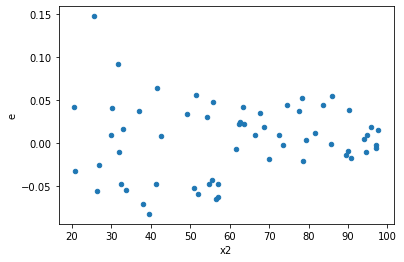

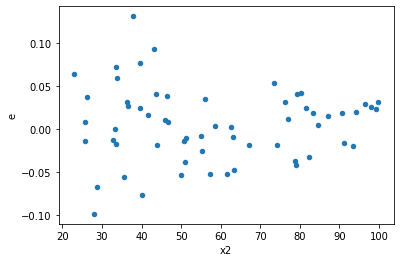

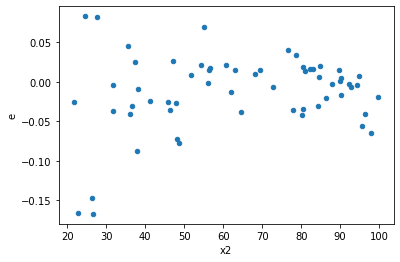

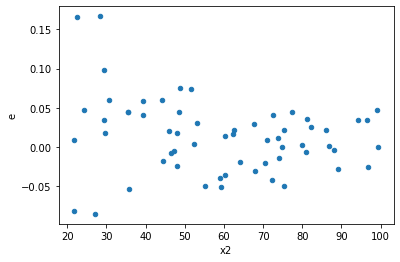

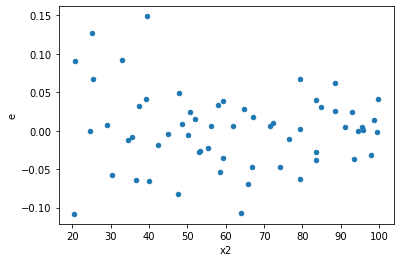

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
219.0,22.0,22.0,0.030722743035881094,0.03714000665889161,0.001396488319812777,0.0016881821208587096,1.2088766493120682,0.6602877705235808,0.6698561147382096,0.3301438852617904,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,0.07023208386296587,0.01837662599873961,0.00319236744831663,0.0008353011817608913,0.2616557132861866,0.002664169570441675,Reject005=0 : Heteroscedasticity
1.0,22.0,22.0,0.03295610917630573,0.023467439129841214,0.0014980049625593515,0.0010667017786291462,0.7120816053951377,0.4321646744385004,Reject005=1 : Homoscedasticity
2.0,22.0,22.0,0.06297220111710246,0.007395946997567679,0.002862372778050112,0.000336179408980349,0.1174478081814903,4.445162093706089e-06,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,0.06430906135252674,0.010839378518426057,0.0029231391523875795,0.0004926990235648208,0.16855134082905052,9.67886620918644e-05,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,0.06653858073379584,0.022660474596935615,0.0030244809424452655,0.0010300215725879826,0.3405614358922756,0.014623994154014205,Reject005=0 : Heteroscedasticity
5.0,22.0,22.0,0.040733049459323205,0.017186476360616605,0.0018515022481510547,0.0007812034709371185,0.4219295286933856,0.04867785369342436,Reject005=0 : Heteroscedasticity
6.0,22.0,22.0,0.15007218305946898,0.016801455795057978,0.0068214628663395,0.000763702536138999,0.11195582987154973,2.8968379975246395e-06,Reject005=0 : Heteroscedasticity
7.0,22.0,22.0,0.15140972261880978,0.022376293273724205,0.0068822601190368085,0.0010171042397147366,0.14778636990214242,3.258909840159432e-05,Reject005=0 : Heteroscedasticity
8.0,22.0,22.0,0.04322476383176404,0.016625828932252514,0.001964761992352911,0.0007557194969205688,0.38463666330167195,0.029570434673747894,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    911
Reject005=1 : Homoscedasticity       89
Name: Result_test, dtype: int64